In [31]:
import numpy as np
import math
from osgeo import gdal, ogr, osr, gdal_array
import os
import random
import matplotlib.pyplot as plt
import whitebox
import rasterio

In [ ]:
#pip install rasterio

In [32]:
from whitebox.whitebox_tools import WhiteboxTools

wbt = WhiteboxTools()

In [11]:
print(wbt.help())

WhiteboxTools Help

The following commands are recognized:
--cd, --wd          Changes the working directory; used in conjunction with --run flag.
--compress_rasters  Sets the compress_raster option in the settings.json file; determines if newly created rasters are compressed. e.g. --compress_rasters=true
-h, --help          Prints help information.
-l, --license       Prints the whitebox-tools license. Tool names may also be used, --license="Slope"
--listtools         Lists all available tools. Keywords may also be used, --listtools slope.
--max_procs         Sets the maximum number of processors used. -1 = all available processors. e.g. --max_procs=2
-r, --run           Runs a tool; used in conjunction with --wd flag; -r="LidarInfo".
--toolbox           Prints the toolbox associated with a tool; --toolbox=Slope.
--toolhelp          Prints the help associated with a tool; --toolhelp="LidarInfo".
--toolparameters    Prints the parameters (in json form) for a specific tool; --toolparame

In [12]:
print(wbt.license())

WhiteboxTools License
Copyright 2017-2023 John Lindsay

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and
associated documentation files (the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense,
and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial
portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT
NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES
OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR

In [13]:
print("Version information: {}".format(wbt.version()))

Version information: WhiteboxTools v2.3.0 (c) Dr. John Lindsay 2017-2023

WhiteboxTools is an advanced geospatial data analysis platform developed at
the University of Guelph's Geomorphometry and Hydrogeomatics Research 
Group (GHRG). See www.whiteboxgeo.com for more details.



In [33]:
#os.chdir(r'C:\Users\sasha\dem_filter')
os.chdir(r'C:\MSU\3 grade\coursework')

In [34]:
os.getcwd()

'C:\\MSU\\3 grade\\coursework'

In [15]:
with rasterio.open('hemisphere_10_noisy_new.tif', 'r') as ds:
    arr = ds.read()

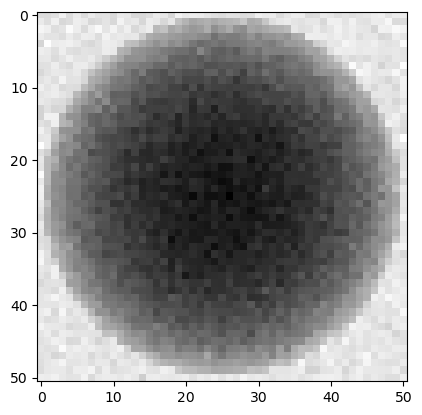

In [16]:
plt.imshow(arr[0], cmap='binary')
plt.show()

In [7]:
arr = arr[0]
arr

array([[ 2.1466434 ,  2.2104795 ,  1.5880985 , ...,  1.4208083 ,
         0.25433397,  0.25942445],
       [ 0.5031546 ,  1.9351106 , -0.19894235, ..., -1.0351044 ,
         2.3857574 ,  2.165321  ],
       [-0.80665183, -0.12175812,  1.9754924 , ..., -0.05697259,
        -1.3469448 , -0.43176606],
       ...,
       [ 1.9845495 ,  1.0416706 ,  0.42092258, ...,  1.8709594 ,
         1.6822968 ,  0.48533252],
       [ 2.205631  ,  0.8710825 ,  0.68059236, ...,  0.94287026,
         0.0631481 ,  2.5634575 ],
       [-0.01487405,  0.2655508 , -0.28491485, ...,  2.006045  ,
         1.9780319 ,  0.05692111]], dtype=float32)

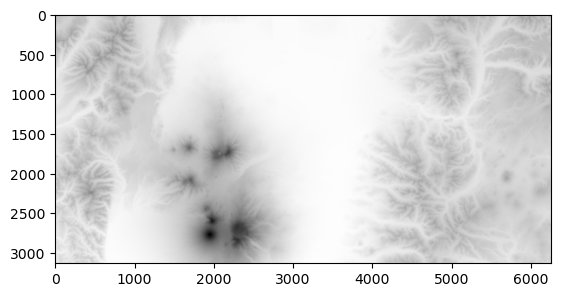

In [23]:
with rasterio.open(r'DEMs\ArcticDEM\Kamchatka\merged_ArcticDEM_Kamchatka.tif', 'r') as ds:
    arr_cl = ds.read()
arr_cl = arr_cl[0]
plt.imshow(arr_cl, cmap='binary')
plt.show()

In [24]:
wbt = whitebox.WhiteboxTools()
# set whitebox working directory
wbt.set_working_dir('.')
wbt.verbose = False

# call whiteboxtool
wbt.mean_filter(
    i = 'DEMs\ArcticDEM\Kamchatka\merged_ArcticDEM_Kamchatka.tif', 
    output = 'merged_ArcticDEM_Kamchatka_output.tif', 
    filterx=3, 
    filtery=3
)

0

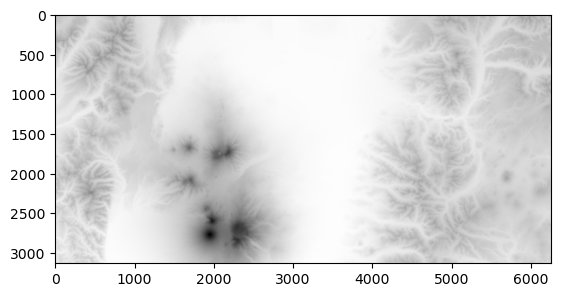

In [27]:
with rasterio.open('DEMs\ArcticDEM\Kamchatka\merged_ArcticDEM_Kamchatka_output.tif', 'r') as ds:
    arr_sm = ds.read()
arr_sm = arr_sm[0]
plt.imshow(arr_sm, cmap='binary')
plt.show()

TypeError: Invalid shape (1, 51, 51) for image data

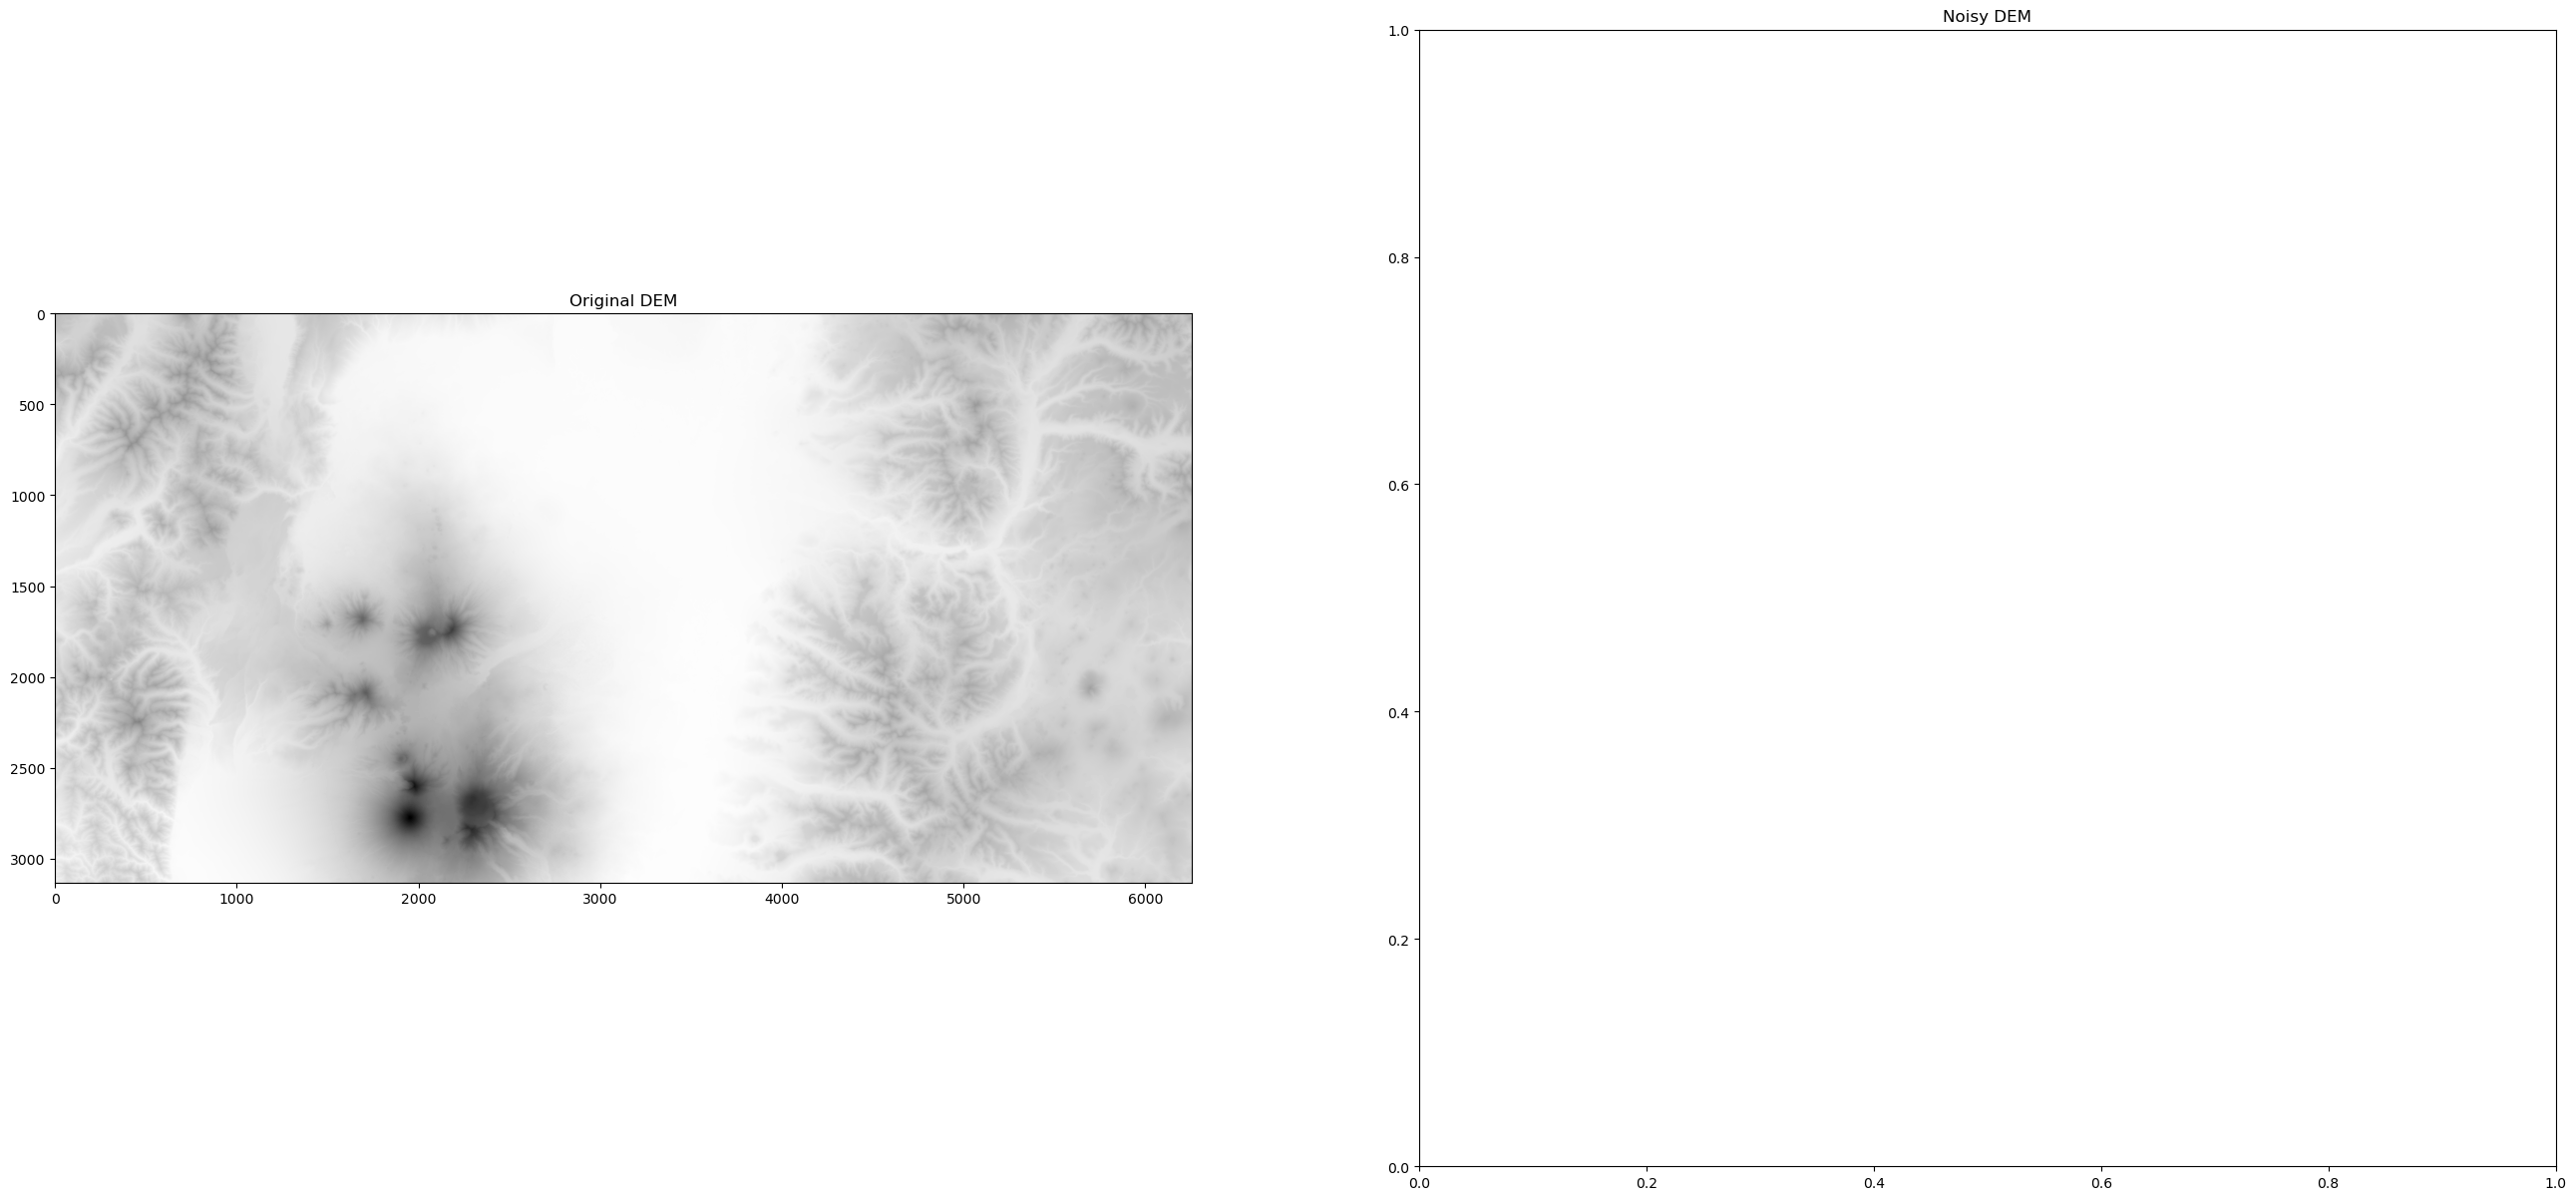

In [30]:
fig = plt.figure(figsize=(50, 50))

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title('Original DEM')
plt.imshow(arr_cl, cmap='binary')
#plt.colorbar()

ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title('Noisy DEM')
plt.imshow(arr, cmap='binary')
#plt.colorbar()

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title('Smoothed DEM')
plt.imshow(arr_sm, cmap='binary')
#plt.colorbar()

plt.show()

#Nothing changed...

In [29]:
np.subtract(arr, arr_sm)

ValueError: operands could not be broadcast together with shapes (1,51,51) (3131,6256) 

In [24]:
print(np.max(np.subtract(arr, arr_sm)), np.max(np.subtract(arr, arr_sm)))

0.0 0.0
